In [2]:
import pandas as pd

In [5]:
import seaborn as sns

In [6]:
data_dir = "./data/"
dataset = './data/azvm/tpcc_scale_100_worktime_3600_samplefreq_1_tsizeAnddeadtuple.csv'

In [8]:
df = pd.read_csv(dataset)

In [9]:
df.head()

,ds,table_name,relid,schemaname,relname,seq_scan,seq_tup_read,idx_scan,idx_tup_fetch,n_tup_ins,...,n_ins_since_vacuum,last_vacuum,last_autovacuum,last_analyze,last_autoanalyze,vacuum_count,autovacuum_count,analyze_count,autoanalyze_count,pg_table_size
0,1.650401e+09,public.customer,17287,public,customer,2,0,6000000.0,97106539.0,3000000,...,360000,NaN,2022-04-19 20:41:54.438578+00:00,NaN,2022-04-19 20:44:48.352263+00:00,0,10,0,14,1859182592
1,1.650401e+09,public.district,17277,public,district,998570,172100607,5001431.0,5001431.0,1000,...,1000,NaN,NaN,NaN,2022-04-19 20:41:46.281870+00:00,0,0,0,8,147456
2,1.650401e+09,public.history,17300,public,history,0,0,NaN,NaN,3000000,...,240000,NaN,2022-04-19 20:43:06.522101+00:00,NaN,2022-04-19 20:43:07.457782+00:00,0,10,0,13,258940928
3,1.650401e+09,public.item,17257,public,item,1,0,10000000.0,10000000.0,100000,...,0,NaN,2022-04-19 20:20:47.094133+00:00,NaN,2022-04-19 20:20:47.243844+00:00,0,1,0,1,10444800
4,1.650401e+09,public.new_order,17327,public,new_order,1,0,0.0,0.0,900000,...,63000,NaN,2022-04-19 20:43:50.975887+00:00,NaN,2022-04-19 20:43:51.159922+00:00,0,10,0,15,39895040


In [131]:
df.table_name.unique()

array(['public.customer', 'public.district', 'public.history',
       'public.item', 'public.new_order', 'public.oorder',
       'public.order_line', 'public.stock', 'public.warehouse'],
      dtype=object)

In [132]:
df.columns

Index(['ds', 'table_name', 'relid', 'schemaname', 'relname', 'seq_scan',
       'seq_tup_read', 'idx_scan', 'idx_tup_fetch', 'n_tup_ins', 'n_tup_upd',
       'n_tup_del', 'n_tup_hot_upd', 'n_live_tup', 'n_dead_tup',
       'n_mod_since_analyze', 'n_ins_since_vacuum', 'last_vacuum',
       'last_autovacuum', 'last_analyze', 'last_autoanalyze', 'vacuum_count',
       'autovacuum_count', 'analyze_count', 'autoanalyze_count',
       'pg_table_size'],
      dtype='object')

In [10]:
df['ds'] = df['ds']-df['ds'].min()
df['ds'] = pd.to_datetime(df['ds'], unit='s')

In [11]:
def plot_growth(df, col):
    return sns.lineplot(data=df, x='ds', y=col, hue='table_name')

In [ ]:
g = sns.FacetGrid(df, row='table_name', sharey=False)
g.map(sns.lineplot, "ds", "n_dead_tup")

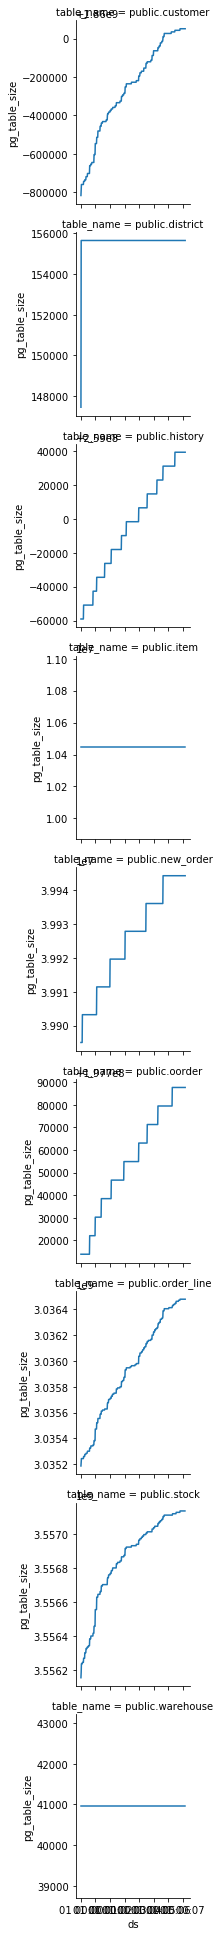

In [12]:
g2 = sns.FacetGrid(df, row='table_name', sharey=False)
g2.map(sns.lineplot, "ds", "pg_table_size")

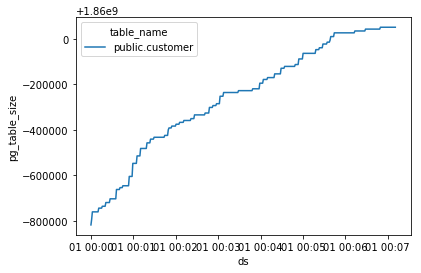

In [15]:
plot_growth(df[df['table_name'] == 'public.customer'].copy(), 'pg_table_size')

In [17]:
df[df['table_name'] == 'public.new_order']

,ds,table_name,relid,schemaname,relname,seq_scan,seq_tup_read,idx_scan,idx_tup_fetch,n_tup_ins,...,n_ins_since_vacuum,last_vacuum,last_autovacuum,last_analyze,last_autoanalyze,vacuum_count,autovacuum_count,analyze_count,autoanalyze_count,pg_table_size
4,1970-01-01 00:00:00.000000000,public.new_order,17327,public,new_order,1,0,0.0,0.0,900000,...,63000,NaN,2022-04-19 20:43:50.975887+00:00,NaN,2022-04-19 20:43:51.159922+00:00,0,10,0,15,39895040
13,1970-01-01 00:00:01.003006935,public.new_order,17327,public,new_order,1,0,0.0,0.0,900000,...,63000,NaN,2022-04-19 20:43:50.975887+00:00,NaN,2022-04-19 20:43:51.159922+00:00,0,10,0,15,39895040
22,1970-01-01 00:00:02.006532192,public.new_order,17327,public,new_order,1,0,0.0,0.0,900000,...,63000,NaN,2022-04-19 20:43:50.975887+00:00,NaN,2022-04-19 20:43:51.159922+00:00,0,10,0,15,39895040
31,1970-01-01 00:00:03.010007858,public.new_order,17327,public,new_order,1,0,0.0,0.0,900000,...,63000,NaN,2022-04-19 20:43:50.975887+00:00,NaN,2022-04-19 20:43:51.159922+00:00,0,10,0,15,39895040
40,1970-01-01 00:00:04.013402223,public.new_order,17327,public,new_order,1,0,0.0,0.0,900000,...,63000,NaN,2022-04-19 20:43:50.975887+00:00,NaN,2022-04-19 20:43:51.159922+00:00,0,10,0,15,39895040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3829,1970-01-01 00:07:06.628280639,public.new_order,17327,public,new_order,1,0,0.0,0.0,900000,...,63000,NaN,2022-04-19 20:43:50.975887+00:00,NaN,2022-04-19 20:43:51.159922+00:00,0,10,0,15,39944192
3838,1970-01-01 00:07:07.632041215,public.new_order,17327,public,new_order,1,0,0.0,0.0,900000,...,63000,NaN,2022-04-19 20:43:50.975887+00:00,NaN,2022-04-19 20:43:51.159922+00:00,0,10,0,15,39944192
3847,1970-01-01 00:07:08.635830640,public.new_order,17327,public,new_order,1,0,0.0,0.0,900000,...,63000,NaN,2022-04-19 20:43:50.975887+00:00,NaN,2022-04-19 20:43:51.159922+00:00,0,10,0,15,39944192
3856,1970-01-01 00:07:09.639850616,public.new_order,17327,public,new_order,1,0,0.0,0.0,900000,...,63000,NaN,2022-04-19 20:43:50.975887+00:00,NaN,2022-04-19 20:43:51.159922+00:00,0,10,0,15,39944192


In [ ]:
plot_growth(df[df['table_name'] == 'public.stock'].copy(), 'n_dead_tup')

In [18]:
from neuralprophet import NeuralProphet

In [53]:
m = NeuralProphet()
prediction_df = df[df['table_name'] == 'public.new_order'].copy().rename(columns={"pg_table_size": "y"})[['ds', 'y']]

In [33]:
ids = prediction_df["ds"]
ids

4      1970-01-01 00:00:00.000000000
13     1970-01-01 00:00:01.003006935
22     1970-01-01 00:00:02.006532192
31     1970-01-01 00:00:03.010007858
40     1970-01-01 00:00:04.013402223
                    ...             
3829   1970-01-01 00:07:06.628280639
3838   1970-01-01 00:07:07.632041215
3847   1970-01-01 00:07:08.635830640
3856   1970-01-01 00:07:09.639850616
3865   1970-01-01 00:07:10.643859863
Name: ds, Length: 430, dtype: datetime64[ns]

In [54]:
metrics = m.fit(prediction_df, freq="s")

INFO - (NP.df_utils._infer_frequency) - Major frequency 1003929138N corresponds to 0.698% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq s. Ignore message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA, or, BAS.
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 26

  0%|          | 0/118 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.19E+01, min: 1.19E+00


  0%|          | 0/118 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 8.38E-02, min: 2.42E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 4.64E-01
Epoch[261/261]: 100%|██████████| 261/261 [00:14<00:00, 17.71it/s, SmoothL1Loss=0.00069, MAE=1.31e+3, RMSE=1.8e+3, RegLoss=0]  


In [42]:
forecast = m.predict(prediction_df)

INFO - (NP.df_utils._infer_frequency) - Major frequency 1003929138N corresponds to 0.698% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq s. Ignore message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA, or, BAS.
INFO - (NP.df_utils._infer_frequency) - Major frequency 1003929138N corresponds to 0.698% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq s. Ignore message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA, or, BAS.


In [43]:
forecast

,ds,y,yhat1,residual1,trend
0,1970-01-01 00:00:00.000000000,39895040,3.989980e+07,4756.027832,39899796.0
1,1970-01-01 00:00:01.003006935,39895040,3.989988e+07,4836.312500,39899876.0
2,1970-01-01 00:00:02.006532192,39895040,3.989996e+07,4916.639160,39899956.0
3,1970-01-01 00:00:03.010007858,39895040,3.990004e+07,4996.961914,39900036.0
4,1970-01-01 00:00:04.013402223,39895040,3.990012e+07,5077.277832,39900116.0
...,...,...,...,...,...
425,1970-01-01 00:07:06.628280639,39944192,3.994420e+07,5.003906,39944196.0
426,1970-01-01 00:07:07.632041215,39944192,3.994420e+07,4.718750,39944196.0
427,1970-01-01 00:07:08.635830640,39944192,3.994420e+07,4.429688,39944196.0
428,1970-01-01 00:07:09.639850616,39944192,3.994420e+07,4.136719,39944196.0


WARNING - (py.warnings._showwarnmsg) - /Users/kaifranz/Library/Python/3.8/lib/python/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]

WARNING - (py.warnings._showwarnmsg) - /Users/kaifranz/Library/Python/3.8/lib/python/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]



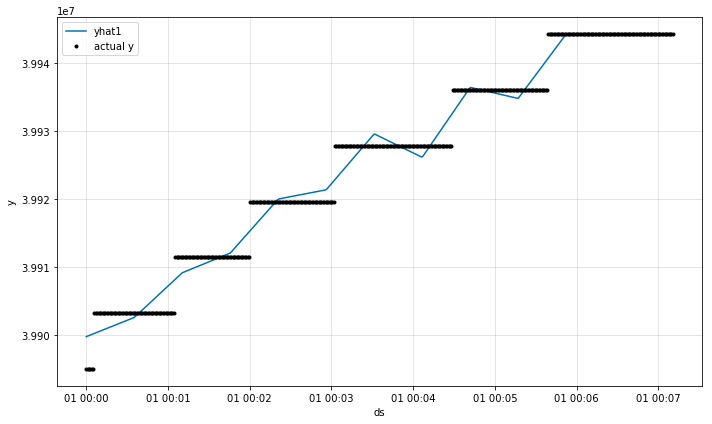

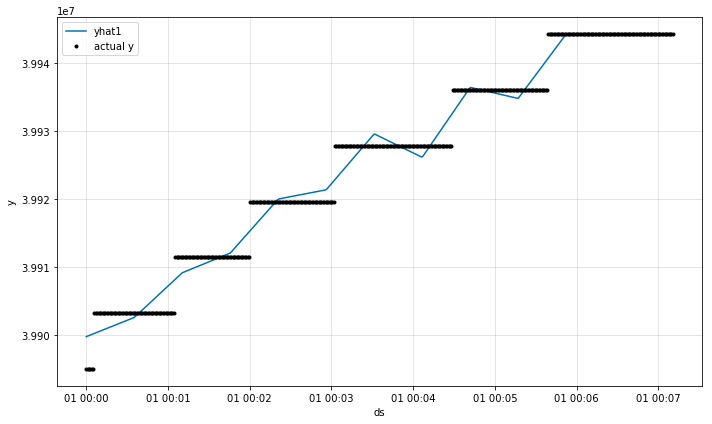

In [45]:
m.plot(forecast)

In [62]:
future = m.make_future_dataframe(df=prediction_df, periods=1000)
predictions = pd.concat((prediction_df, future))
predictions

INFO - (NP.df_utils._infer_frequency) - Major frequency 1003929138N corresponds to 0.698% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq s. Ignore message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA, or, BAS.


,ds,y
4,1970-01-01 00:00:00.000000000,39895040
13,1970-01-01 00:00:01.003006935,39895040
22,1970-01-01 00:00:02.006532192,39895040
31,1970-01-01 00:00:03.010007858,39895040
40,1970-01-01 00:00:04.013402223,39895040
...,...,...
995,1970-01-01 00:23:46.643859863,None
996,1970-01-01 00:23:47.643859863,None
997,1970-01-01 00:23:48.643859863,None
998,1970-01-01 00:23:49.643859863,None


In [63]:
forecast = m.predict(df=predictions)

INFO - (NP.df_utils._infer_frequency) - Major frequency S corresponds to 69.93% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq s. Ignore message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA, or, BAS.
INFO - (NP.df_utils._infer_frequency) - Major frequency S corresponds to 69.93% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq s. Ignore message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA, or, BAS.
WARNING - (py.warnings._showwarnmsg) - /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/neuralprophet/forecaster.py:1406: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_end_to_append)



WARNING - (py.warnings._showwarnmsg) - /Users/kaifranz/Library/Python/3.8/lib/python/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]

WARNING - (py.warnings._showwarnmsg) - /Users/kaifranz/Library/Python/3.8/lib/python/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]



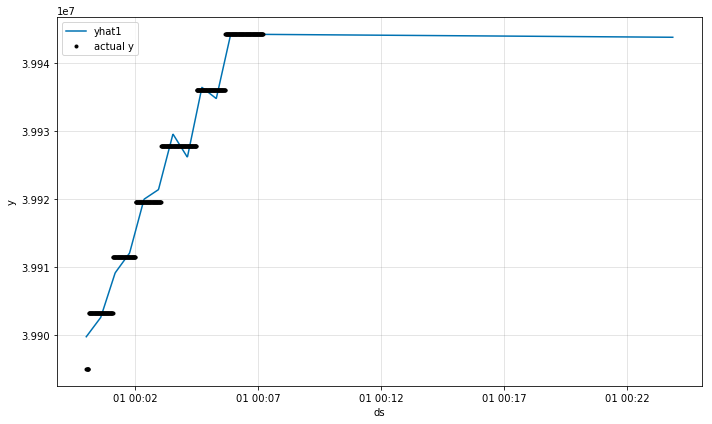

In [64]:
fig_forecast = m.plot(forecast)

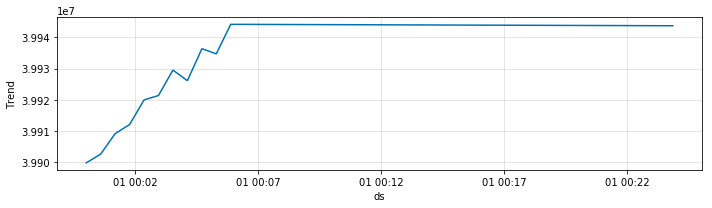

In [65]:
fig_comp = m.plot_components(forecast)